In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Project/Garbage_detection/garbage_classification/'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [ ]:
DATADIR = '/content/drive/MyDrive/Project/Garbage_detection/garbage_classification/'
CATEGORIES = ['white-glass','trash','Training','plastic','paper','metal','shoes','Testing','clothes','cardboard','green-glass','brown-glass','biological','battery']
IMG_SIZE=100

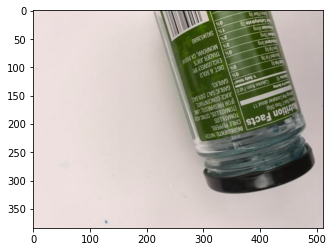

In [ ]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break


In [ ]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [ ]:
print(len(training_data))

15518


# storing Training lenght

In [ ]:
lenofimage = len(training_data)

# for image to be trained we have to convert the image to a array form so,that our model can train on it...!!

# and X should be of type (training_data_length , -1) because SVM takes 2D input to train

In [ ]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [ ]:
X.shape


(15518, 30000)

# Flattening the arrays


In [ ]:
X = X/255.0

# Ex. of flattened array...

In [ ]:
X[1]

array([0.71764706, 0.83921569, 0.92941176, ..., 0.16470588, 0.28235294,
       0.34901961])

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(15518,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
# Fitting Data In SVM Model

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

# Predicting the X_test

In [ ]:
y2 = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.5265463917525773


In [ ]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.26      0.36      0.30       204
           1       0.43      0.58      0.49       179
           3       0.27      0.39      0.32       203
           4       0.50      0.29      0.37       264
           5       0.26      0.23      0.25       206
           6       0.37      0.37      0.37       510
           8       0.78      0.79      0.78      1292
           9       0.41      0.54      0.46       211
          10       0.79      0.75      0.77       174
          11       0.34      0.33      0.33       138
          12       0.48      0.33      0.39       243
          13       0.50      0.32      0.39       256

    accuracy                           0.53      3880
   macro avg       0.45      0.44      0.44      3880
weighted avg       0.54      0.53      0.53      3880



In [ ]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [ ]:
result

,original,predicted
0,6,6
1,8,8
2,8,8
3,6,6
4,8,8
...,...,...
3875,12,6
3876,10,10
3877,1,1
3878,13,10
